In [217]:
%matplotlib inline

import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

#sklearn
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, RobustScaler, StandardScaler

from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix, roc_curve, auc
from sklearn.metrics import roc_auc_score, precision_score, recall_score, make_scorer
from sklearn.metrics import plot_confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict, GridSearchCV
from sklearn.inspection import permutation_importance

from sklearn.neighbors import KNeighborsClassifier

#json
import json

In [218]:
global_info = {}

In [219]:
with open('temporal_info.json', 'r') as fp:
    global_info = json.load(fp)

In [228]:
global_info.keys()

dict_keys(['qcut', 'kmeans', 'no_discr'])

In [240]:
global_info['no_discr']['validation']

{'36f onehot-encoded no discretized': {'fpr': [0.0, 0.04794520547945205, 1.0],
  'tpr': [0.0, 0.2903225806451613, 1.0],
  'roc': 0.6211886875828546},
 '20f onehot-encoded no discretized': {'fpr': [0.0, 0.0821917808219178, 1.0],
  'tpr': [0.0, 0.45161290322580644, 1.0],
  'roc': 0.6847105612019444},
 '24f numerical-encoded no discretized': {'fpr': [0.0,
   0.1324200913242009,
   1.0],
  'tpr': [0.0, 0.34782608695652173, 1.0],
  'roc': 0.6077029978161604},
 '15f numerical-encoded no discretized': {'fpr': [0.0,
   0.1278538812785388,
   1.0],
  'tpr': [0.0, 0.43478260869565216, 1.0],
  'roc': 0.6534643637085567}}

In [239]:
global_info['no_discr']['validation']['36f onehot-encoded no discretized']

{'fpr': [0.0, 0.04794520547945205, 1.0],
 'tpr': [0.0, 0.2903225806451613, 1.0],
 'roc': 0.6211886875828546}

In [383]:
#colors = [['no_discr_colors'], ['qcut_colors'], ['kmeans_colors']]
colors = [['#002EB8', '#668CFF', '#66CCFF', '#0091C2'], 
          ['#FFFF24', '#FF9124', '#CCCC00', '#CC6600'], 
          ['#CC0066', '#FF61B0', '#B061FF', '#CC6699']]

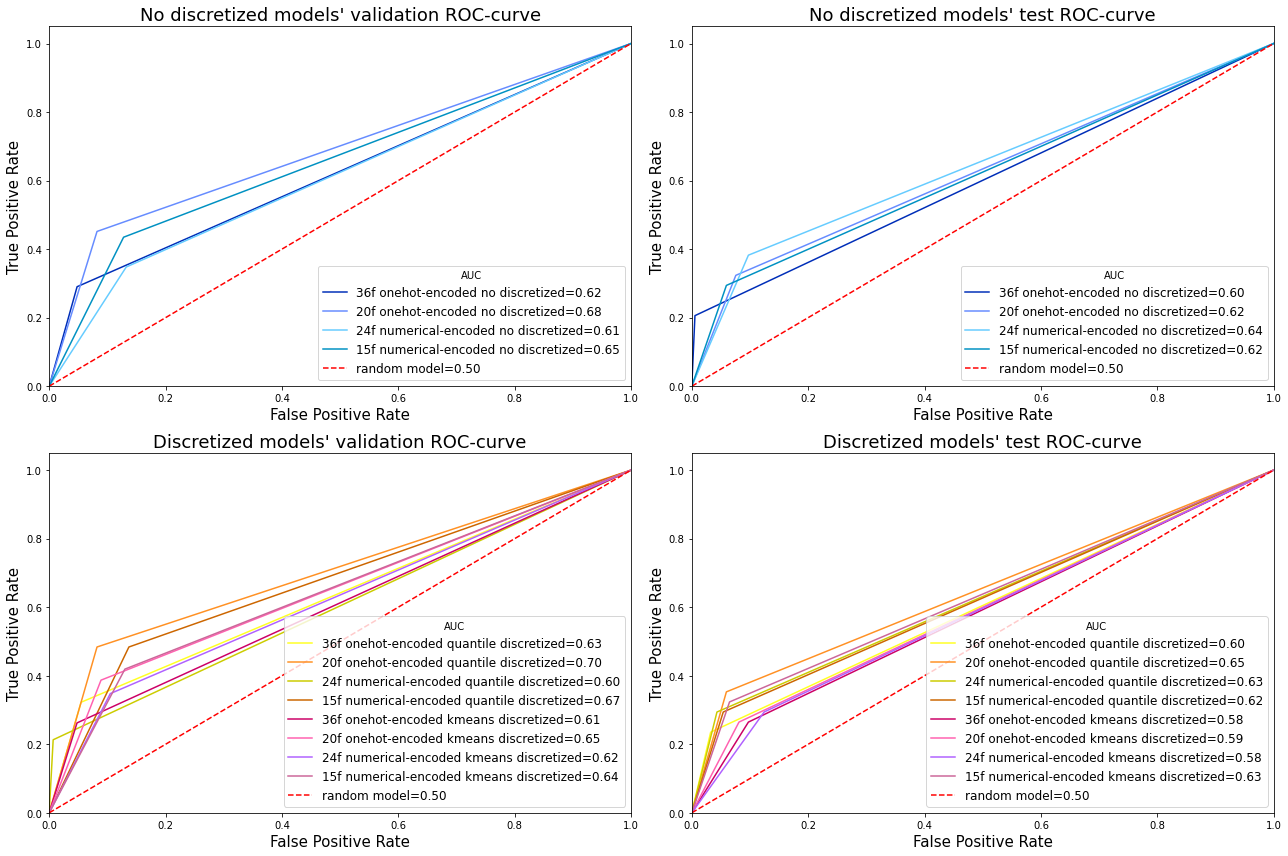

In [414]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (18, 12))
type_flag_list = ['validation', 'test']


for n, type_flag in enumerate(type_flag_list):
    
    i = 0
    
    for model_name in global_info['no_discr'][type_flag]:
        
        color = colors[0][i]
        i+=1
        fpr = global_info['no_discr'][type_flag][model_name]['fpr']
        tpr = global_info['no_discr'][type_flag][model_name]['tpr']
        roc_auc = global_info['no_discr'][type_flag][model_name]['roc']
        ax[0, n].plot(fpr, tpr, color = color, label = "%s=%0.2f" %(model_name, roc_auc))
            
    ax[0, n].plot([0, 1], [0, 1], 'r--', label='random model=0.50') 
    ax[0, n].set_xlim([0.0, 1.0])
    ax[0, n].set_ylim([0.0, 1.05])
    ax[0, n].set_xlabel('False Positive Rate', fontsize = 15)
    ax[0, n].set_ylabel('True Positive Rate', fontsize = 15) 
    ax[0, n].tick_params(axis='both', which='major')
    ax[0, n].legend(loc="lower right", title="AUC", frameon=True, fontsize = 12)
    ax[0, n].set_title("No discretized models' %s ROC-curve" % (type_flag), fontsize = 18)
    
    
    c = 0
    
    for discretization in (global_info.keys()):
        c+=1
        if discretization != 'no_discr':
            i = 0
            for model_name in global_info[discretization][type_flag]:
                color = colors[c][i]
                i+=1
                fpr = global_info[discretization][type_flag][model_name]['fpr']
                tpr = global_info[discretization][type_flag][model_name]['tpr']
                roc_auc = global_info[discretization][type_flag][model_name]['roc']
                ax[1, n].plot(fpr, tpr, color = color, label = "%s=%0.2f" %(model_name, roc_auc))

            ax[1, n].set_xlim([0.0, 1.0])
            ax[1, n].set_ylim([0.0, 1.05])
            ax[1, n].set_xlabel('False Positive Rate', fontsize = 15)
            ax[1, n].set_ylabel('True Positive Rate', fontsize = 15) 
            ax[1, n].tick_params(axis='both', which='major')
            ax[1, n].set_title("Discretized models' %s ROC-curve" % (type_flag), fontsize = 18)
            
    ax[1, n].plot([0, 1], [0, 1], 'r--', label='random model=0.50')
    ax[1, n].legend(loc="lower right", title="AUC", frameon=True, fontsize = 12)
    
fig.tight_layout()
plt.show() 